In [ ]:
# default_exp comparison

# comparison

> AquaCrop-OSP | AquaCrop-OS | AquaCrop | Test Comparison
> aquacrop python is tested against windows aquacrop and matlab to ensure 


## Excersise 7: Wheat production in Tunis

### From Chapter 7 of  <a href="../pdfs/AquaCrop_TrainingHandookB.pdf">AquaCrop Training Handbook</a> (pg. 64)

### Description

This set of exercises will assess the average winter wheat production that can be expected in
Tunis (Tunisia) under different environmental conditions and agronomic practices (local crop
varieties, soils, management). Both rainfed and irrigated cropping systems will be evaluated.


The capital Tunis is located in north Tunisia (36°48’N, 10°10’E) and has a semi-arid climate
(Fig. 7.1). Rainfed crops can be cultivated between October and March, when most rainfall
events take place and ET 0 is relatively low. In addition, irrigated crops can be cultivated at other
times in the year, even in the summer months when no rainfall occurs.

<img src="images/tunis_weather_pic.png" width="500" height="250"/>

## Exercise 7.1: Assessing crop yield for local soils

Determine the average winter wheat yield that can be expected in the region of Tunis when soil
fertility is non-limiting. Run therefore a series of 23 years of historical weather data (1979-
2002). According to local practices, farmers sow wheat at the beginning of the rainy season,
assume on 15 October. Assess the yield on a sandy loam soil and on a local soil.
Assume that on the day of sowing the soil is wetted at the top, but still dry in deeper soil layers.

### Imports

In [ ]:
#export
import sys
_=[sys.path.append(i) for i in ['.', '..']]

In [ ]:
#hide
%load_ext autoreload
%autoreload 2

In [ ]:
#export
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from aquacrop.core import *
from aquacrop.classes import *
import seaborn as sns

### Run comparison

In [ ]:
def compile_func():
    wdf = prepare_weather(get_filepath('tunis_climate.txt'))
    wdf.Date.min(),wdf.Date.max()

    soil = SoilClass('ac_TunisLocal',CalcCN=0)
    crop = CropClass('Wheat',PlantingDate= '10/15',)
    iwc = InitWCClass('Num','Depth',[0.3,0.9],[0.3,0.15])
    model = AquaCropModel('1981/10/15','1984/05/31',wdf,soil,crop,InitWC=iwc)
    model.initialize()
    model.step(till_termination=True)
    return model
    
%time model = compile_func()

CPU times: user 149 ms, sys: 4.02 ms, total: 153 ms
Wall time: 151 ms


In [ ]:
#model.Outputs.Final

In [ ]:
#export
def run_comparison(model,name):
    """
    Function to run a comparison between python matlab and windows. 
    Plots yields and prints mean and mean absolute error between them
    
    *Arguments:* 

    
    `name`: `str` : name of directory containing input files

    *Returns:*

    None

        
    """    
    Outputs = model.Outputs
    
    py = Outputs.Final.round(3)
    
    matlab = pd.read_csv(get_filepath(name+'_matlab.txt'),delim_whitespace=True,header=None)
    matlab.columns = ["season","crop","plantdate","stepplant","harvestdate","stepharvest","Yield","tirr"]

    
    windows_names = ('    RunNr     Day1   Month1    Year1     Rain      ETo       GD     CO2      Irri   Infilt   Runoff    Drain   Upflow        E     E/Ex       Tr      TrW   Tr/Trx    SaltIn   SaltOut    SaltUp  SaltProf     Cycle   SaltStr  FertStr  WeedStr  TempStr   ExpStr   StoStr  BioMass  Brelative   HI     Yield     WPet     DayN   MonthN    YearN'.split())
    windows = pd.read_csv(get_filepath(name+'_windows.OUT'),skiprows=5,delim_whitespace=True,names=windows_names)

    combined = pd.DataFrame([py.Yield,windows.Yield,matlab.Yield]).T

    combined.columns = ["py", "windows","matlab"]
    mae = np.round(np.abs(combined.py - combined.windows).mean(),2)
    pymean = combined.mean().py.round(2)
    print(f'python seasonal mean: {pymean} kg/ha\nMAE from windows: {mae} kg/ha')
    
    mae_mat = np.round(np.abs(combined.py - combined.matlab).mean(),3)
    print(f'MAE from matlab:  {mae_mat} kg/ha')
    
    plt.style.use('seaborn')
    
    fig, ax = plt.subplots(2,1,sharex=True,figsize=(11,8))
    
    ax[0].plot(py.Yield,label='Python')
    ax[0].plot(matlab.Yield,label='Matlab')
    ax[0].plot(windows.Yield,'--',label='Windows')
    ax[0].legend(fontsize = 18)
    ax[0].set_ylabel('Yield',fontsize=18)
    
    #sns.jointplot(np.arange(len(py)), py.Yield - windows.Yield,
      #            kind="resid",color="m",ratio=10)
    
    ax[1].scatter(np.arange(len(py)),py.Yield - windows.Yield,label='Python')
    ax[1].scatter(np.arange(len(py)),matlab.Yield - windows.Yield,label='Matlab')
    ax[1].plot([0,len(py)],[0,0],'--',color='black')
    ax[1].set_xlabel('Season',fontsize=18)
    ax[1].set_ylabel('Residuals',fontsize=18)
    ax[1].legend(fontsize = 18)

    



    plt.show()
    
    
    return Outputs,windows

In [ ]:
wdf = prepare_weather(get_filepath('tunis_climate.txt'))
wdf.Date.min(),wdf.Date.max()

soil = SoilClass('ac_TunisLocal')

crop = CropClass('Wheat',PlantingDate= '10/15')

iwc = InitWCClass('Num','Depth',[0.3,0.9],[0.3,0.15])

model = AquaCropModel('1979/10/15','2002/05/31',wdf,soil,crop,InitWC=iwc)
model.initialize()



%time model.step(till_termination=True)

CPU times: user 1.77 s, sys: 4.04 ms, total: 1.78 s
Wall time: 1.78 s


python seasonal mean: 7.52 kg/ha
MAE from windows: 0.02 kg/ha
MAE from matlab:  0.003 kg/ha


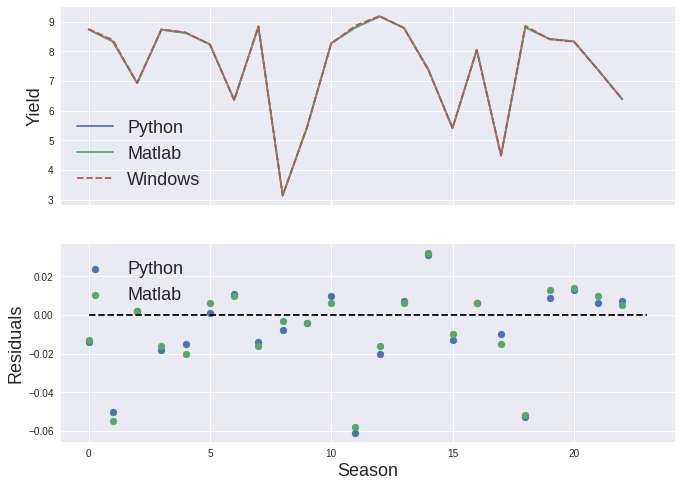

In [ ]:
res = run_comparison(model,'tunis_test_1')

In [ ]:
#hide
#(model.Outputs.Flux/model.Outputs.Flux.max()).plot()
# res[0].Flux.groupby('SeasonCounter')["P"].sum().plot()
# res[1].Rain.plot()

#model.Outputs.Final

# res[0].Flux.columns

# step=res[0].Final.Step.values
# var = "B"; df = res[0].Growth[res[0].Growth.TimeStepCounter.isin(step)]
# df=df[var]

# plt.plot(df.values)
# (100*res[1]["Tr"]).plot()
# res[0].Flux.groupby('SeasonCounter').sum()["DeepPerc"].plot()
# (1*res[1]["Irri"]).plot()



# res[1].columns

# res[0].Growth.columns

# res[0].Growth.Zroot

# res[1][['ExpStr', 'StoStr']].plot()

# res[0].Growth.groupby('SeasonCounter').max()["CC"].plot()
# res[0].Growth.groupby('SeasonCounter').max()["CC_NS"].plot()


### Sandy loam soil

python seasonal mean: 8.64 kg/ha
MAE from windows: 0.01 kg/ha
MAE from matlab:  0.002 kg/ha


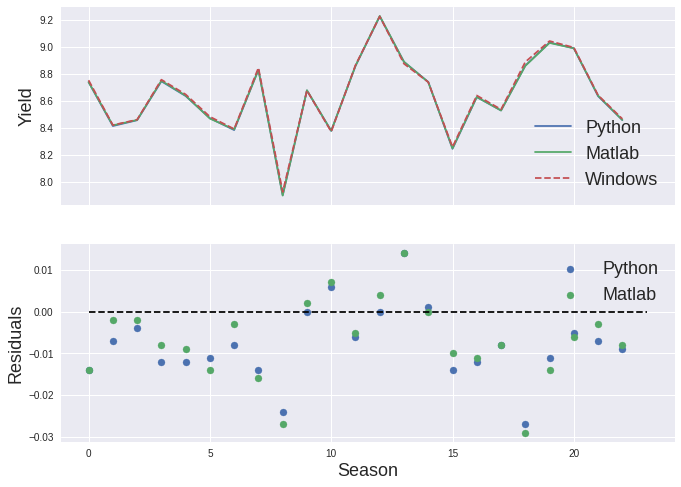

In [ ]:
sandy_loam = SoilClass('SandyLoam')
model = AquaCropModel('1979/01/01','2002/05/31',wdf,sandy_loam,crop,InitWC=iwc)
model.initialize()
model.step(till_termination=True)
res = run_comparison(model,'tunis_test_1_SandyLoam')

## Excercise 7.2 Local Wheat variety

In [ ]:
local_wheat = CropClass('Wheat',PlantingDate= '10/15',
                        Emergence=289, 
                        MaxRooting = 1322,
                        Senescence = 2835, 
                        Maturity = 3390,
                        HIstart = 2252,
                        Flowering = 264,
                        YldForm = 1073,
                        PlantPop=3_500_000,
                        CCx=0.9,
                        CDC=0.003888,
                        CGC=0.002734)

python seasonal mean: 8.68 kg/ha
MAE from windows: 0.04 kg/ha
MAE from matlab:  0.041 kg/ha


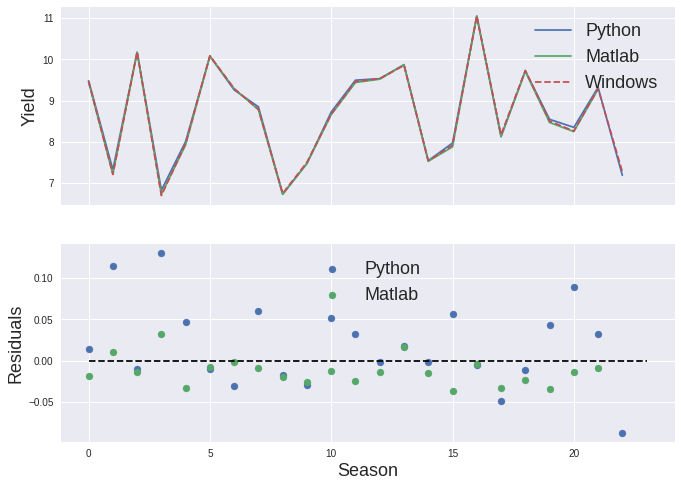

In [ ]:
model = AquaCropModel('1979/01/01','2002/05/31',wdf,sandy_loam,local_wheat,InitWC=iwc)
model.initialize()
model.step(till_termination=True)
_ = run_comparison(model,'tunis_test_2_long')

## Excercise 7.3 Different initial conditions

In [ ]:
iwc30taw = InitWCClass('Pct','Layer',[1],[30])

python seasonal mean: 5.85 kg/ha
MAE from windows: 0.09 kg/ha
MAE from matlab:  0.003 kg/ha


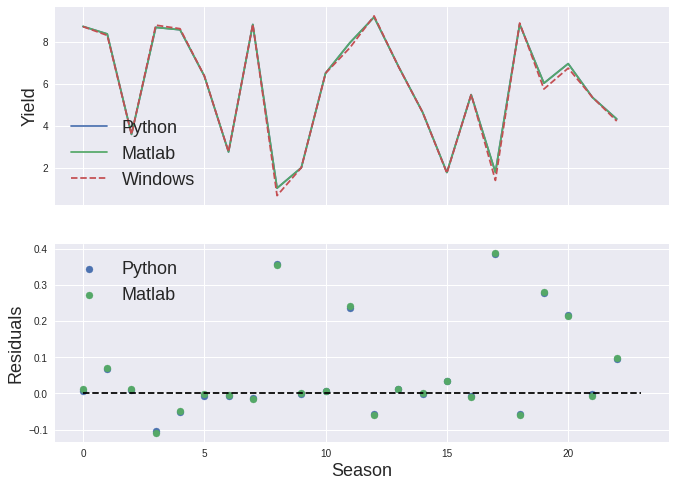

In [ ]:
model = AquaCropModel('1979/01/01','2002/05/31',wdf,sandy_loam,
                      crop,InitWC=iwc30taw)
model.initialize()
model.step(till_termination=True)
_ = run_comparison(model,'tunis_test_3_30taw')

## Excercise 7.6 Net irrigation requirement

In [ ]:
net_irr = IrrMngtClass(IrrMethod=4,NetIrrSMT=78.26)
wp = InitWCClass(value=['WP'])
wheat_dec = CropClass('Wheat',PlantingDate='12/01',HarvestDate='07/30')

python seasonal mean: 8.38 kg/ha
MAE from windows: 0.01 kg/ha
MAE from matlab:  0.003 kg/ha


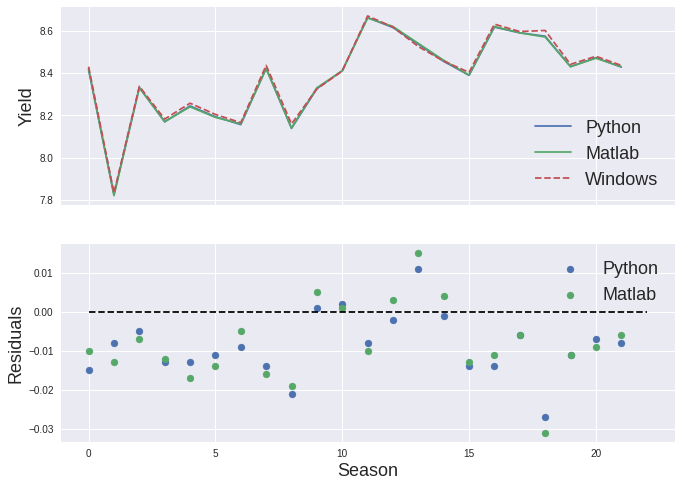

In [ ]:
model = AquaCropModel('1979/08/15','2001/07/30',wdf,sandy_loam,
                      wheat_dec,InitWC=wp,IrrMngt=net_irr)
model.initialize()
model.step(till_termination=True)
res = run_comparison(model,'tunis_test_6')

## Excersise 8 : Hyderabad : Chapter 8 of  <a href="../pdfs/AquaCrop_TrainingHandookB.pdf">AquaCrop Training Handbook</a>

## Excersise 8.1

In [ ]:
wdf = prepare_weather(get_filepath('hyderabad_climate.txt'))

wdf.Date.min(),wdf.Date.max()

(Timestamp('2000-01-01 00:00:00'), Timestamp('2010-12-31 00:00:00'))

python seasonal mean: 6.43 kg/ha
MAE from windows: 0.01 kg/ha
MAE from matlab:  0.013 kg/ha


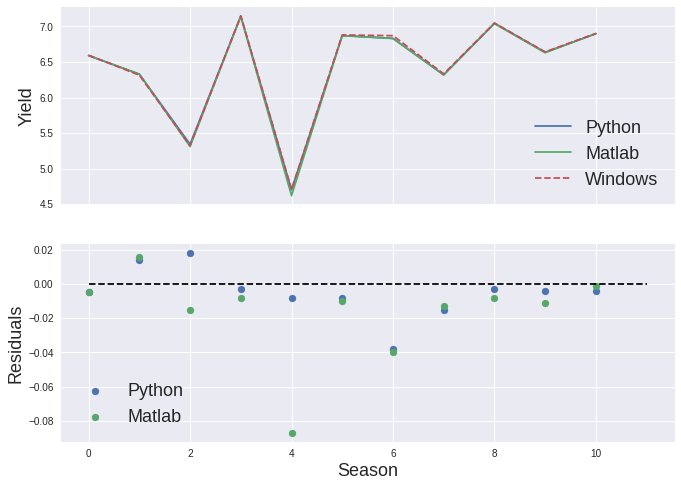

In [ ]:
rice = CropClass('Rice',PlantingDate= '08/01',)
paddy = SoilClass('Paddy')
iwc_paddy = InitWCClass(depth_layer=[1,2],value=['FC','FC'])
fm = FieldMngtClass(Bunds='Y',zBund=0.2)
model = AquaCropModel('2000/01/01','2010/12/31',wdf,paddy,
                      rice,InitWC=iwc_paddy,FieldMngt=fm,
                      FallowFieldMngt=fm)
model.initialize()
model.step(till_termination=True)
_ = run_comparison(model,'paddyrice_hyderabad')

## Excersise 9 : Brussels : Chapter 9 of  <a href="../pdfs/AquaCrop_TrainingHandookB.pdf">AquaCrop Training Handbook</a>

### Excersise 9.1

In [ ]:
wdf = prepare_weather(get_filepath('brussels_climate.txt'))

wdf.Date.min(),wdf.Date.max()

(Timestamp('1976-01-01 00:00:00'), Timestamp('2005-12-31 00:00:00'))

python seasonal mean: 9.69 kg/ha
MAE from windows: 0.11 kg/ha
MAE from matlab:  0.028 kg/ha


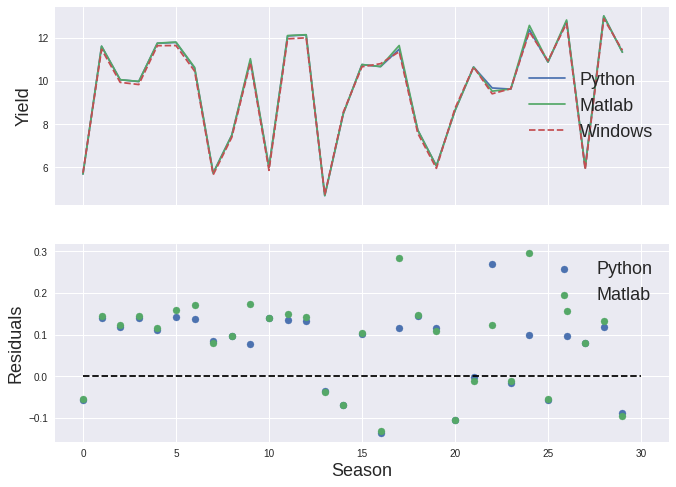

In [ ]:
potato = CropClass('Potato',PlantingDate= '04/25',)
loam = SoilClass('Loam')
model = AquaCropModel('1976/01/01','2005/12/31',wdf,loam,potato,InitWCClass())
model.initialize()
model.step(till_termination=True)
_ = run_comparison(model,'potato')